# ML Classifications - Logistic Regression

Découvrons la régression logistique, un algorithme d'apprentissage automatique utilisé pour résoudre les problèmes de classification !

## Objectifs


- Comprendre la différence entre régression et classification.
- Comprendre le fonctionnement des algorithmes de régression logistique.
- Utiliser la régression logistique avec scikit-learn.

## Rappel

L'apprentissage automatique consiste à apprendre à l'aide d'exemples. Lorsque vous formiez auparavant un modèle de régression linéaire, vous donniez des exemples de données à l'algorithme. Et votre machine a trouvé l'équation. Ensuite, vous pouvez prédire en utilisant cette équation.

**C'est ainsi que fonctionnent tous les algorithmes d'apprentissage automatique : nous leur donnons des exemples de données, l'algorithme trouve une règle, puis nous pouvons prédire en utilisant cette règle.**

## Classifications

Nous avons déjà vu un algorithme de régression (oui, la régression est une famille, et la régression linéaire n'est qu'un algorithme de cette famille).
Aujourd'hui, nous allons apprendre un algorithme de classification. Vous pouvez vous référer à cette [cartographie](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) pour voir à quelle famille chaque algorithme appartient :

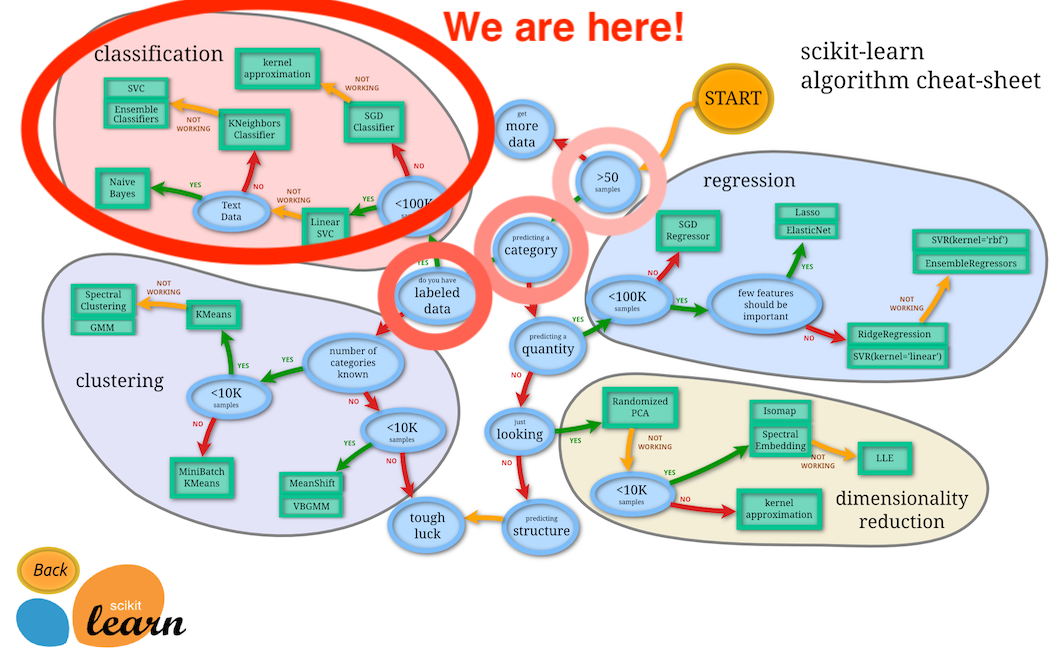

Vous effectuez une classification lorsque vous essayez de prédire une catégorie. Par exemple,

- si vous essayez de prédire quelle est la taille de cet animal : c'est une question de régression.
- si vous essayez de prédire ce qu'est cet animal : un chien ou un chat ? C'est une question de classification.

> En théorie, on dit qu'un algorithme de régression traite des valeurs *numériques, continues et ordonnées*. Un algorithme de classification traite des valeurs *non-continues et non-ordonnées*.

## Régression logistique


Comment pourrions-nous techniquement faire cela ? Jouons à un petit jeu. Nous mettons un numéro à chaque catégorie (nous les appellerons classes à partir de maintenant).

- chien = 0
- chat = 1

Je pourrais donner ces nombres comme cibles pour ma régression linéaire, et voir si j'obtiens un bon résultat.

1. Si mon algorithme prédit "1" :

c'est certainement un chat

2. Si mon algorithme prédit "0" :

il s'agit certainement d'un chien

3. Si mon algorithme prédit "0.5" :

Peut-être un chat, peut-être un chien

4. Si mon algorithme prédit "0.8" :

C'est probablement un chat à 80%, mais je ne suis pas aussi confiant que je l'étais avec les prédictions précédentes

C'est peut-être un chien à 20%, qui sait ?

Alors, comment interpréter si ma prédiction est de 0.8 ? On pourrait dire que le modèle n'est pas sûr, mais à 80% ça devrait être un chat. C'est le principe de la régression logistique : on fait des régressions sur la probabilité, et non sur la valeur.

La *limite* de 50% s'appelle un **seuil**. Ici, on a un seuil = 0,5.

> Ainsi, une régression logistique n'est pas un algorithme de régression, mais un algorithme de classification ! Pourquoi ce nom ? Parce que, techniquement, on applique une régression aux probabilités des catégories.

Pour expliquer cela, regardons ces deux graphiques.

- Une régression linéaire essaie de trouver la ligne qui passe le plus près de tous les points. Plus vous êtes proche de la ligne, meilleure est votre prédiction.
- Une régression logistique essaie de trouver la ligne qui sépare le plus les deux catégories. Plus vous êtes proche de la ligne, moins vous êtes sûr de votre prédiction (50% pour chaque classe / catégorie). Plus vous êtes loin de la ligne, plus vous êtes sûr de votre prédiction. La ligne est appelée "**frontière de décision**".

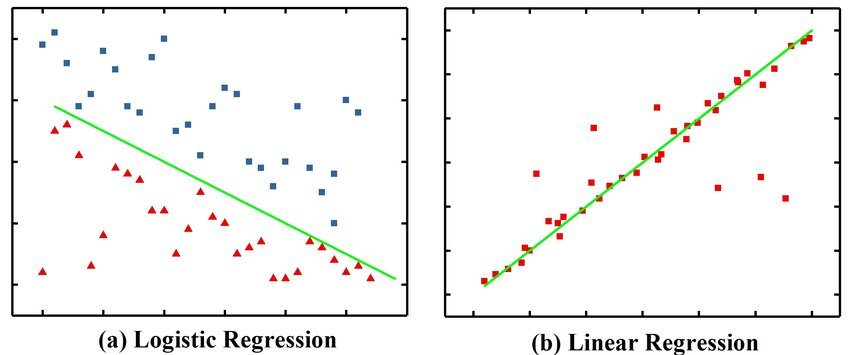

Et comment l'algorithme trouve-t-il la ligne avec la meilleure équation ? Comme la plupart des algorithmes d'apprentissage automatique, il est basé sur l'essai et l'apprentissage. L'algorithme essaie une équation, puis une autre, puis une autre... et il garde la meilleure équation. Chaque essai est appelé une "**epoch**". Quelque chose comme ça :

https://storage.googleapis.com/quest_editor_uploads/Kq8Z70gt4sOpKgKiwweGuV5knElRNfWA.gif 

*GIF : Université de Toronto*


> Chaque epoch est-elle totalement aléatoire ? Non, bien sûr. Les algorithmes incluent des optimisations pour accélérer la recherche de la meilleure solution. Actuellement, vous n'avez pas à vous en soucier.

## Régression logistique avec scikit-learn


Scikit-learn a une très bonne syntaxe. Vous rappelez-vous comment faire une prédiction pour une régression linéaire ? C'est à peu près la même chose pour une régression logistique, tellement facile !

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['variable_column1', 'variable_column2', 'variable_column3']]
y = df['target_column']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# We train the model
model = LogisticRegression().fit(X_train,y_train)

# We predict on the 5 first rows
model.predict(X_test.iloc[:5,:])

` >>> array(['dog', 'cat', 'cat', 'cat', 'dog'], dtype=object)`

Pour la première ligne de `X_test`, notre modèle prédit un chien. Pour la deuxième ligne, un chat, etc... Pour être plus précis, nous pouvons utiliser la méthode `predict_proba()`.



In [ ]:
model.predict_proba(X_test.iloc[:5, :])

`>>> array([[0.47220034, 0.52779966],
           [0.89585794, 0.10414206],
           [0.77575606, 0.22424394],
           [0.96171163, 0.03828837],
           [0.10847817, 0.89152183]])`

On obtient un array NumPy. Pour chaque ligne, nous avons la probabilité de chaque classe (la catégorie). Pour savoir quel est l'ordre des classes, on utilise l'attribut `classes_`.



In [ ]:
model.classes_

`array(['cat', 'dog'], dtype=object)`

- Pour la première ligne, le modèle prédit une probabilité de 47 % d'être un chat et une probabilité de 52,8 % d'être un chien. Le modèle est incertain pour cette première ligne.
- Pour la deuxième ligne, notre modèle est assez confiant : à 89.5% c'est un chat !

## Métrique

**Calculons un score global:**

In [ ]:
print("score d'exactitude (accuracy) sur l'ensemble d'entraînement :",model.score(X_train, y_train))
print("score d'exactitude (accuracy) sur l'ensemble de test :",model.score(X_test, y_test))

```
>>> score d'exactitude (accuracy) sur l'ensemble d'entraînement : 0.72
>>> score d'exactitude (accuracy) sur l'ensemble de test : 0.70


Nous avons un très bon score, et pas d'overfitting, yeepee ! Quel est ce score ? Ce n'est pas un R2-score (dédié aux régressions). C'est un **accuracy score** (dédié aux classifications). Mais qu'est-ce que cela signifie ? Et est-ce une bonne métrique ?

Référez-vous au cours sur les KNN pour revoir les métriques utilisées en classifications

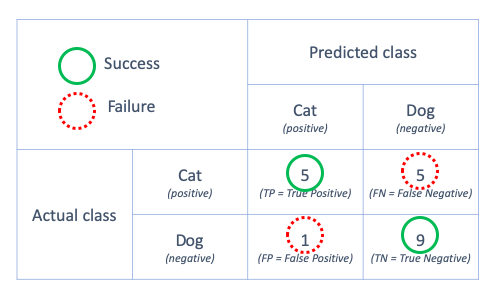

## Paramètres


Il existe de nombreux paramètres pour une régression logistique. Nous allons voir deux d'entre eux ici. Vous pourrez aller dans les ressources pour aller plus loin.

#### Paramètre **max_iter**

Ce paramètre vous permet de limiter votre algorithme. Comme l'algorithme d'apprentissage automatique fonctionne en try&learn, il peut prendre beaucoup de temps sur un grand jeu de données. Vous pouvez limiter le nombre maximum d'itérations (epoch).

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# After training, you can see how many iterations have been done:
model.n_iter_

#### Paramètre **class_weight**

Le paramètre class_weight permet de modifier l'importance de chaque classe. Par défaut, chaque classe vaut 1, toutes les classes sont égales. Si je modifie ce paramètre, pour donner plus d'importance à la classe "chat", observons le résultat.

In [ ]:
model = LogisticRegression(class_weight = {'cat' : 10})
model.fit(X_train,y_train)

Le modèle ne se trompe plus sur les chats, il les a tous prédits correctement. Par contre, il est beaucoup plus faux pour les chiens !

**Aucun modèle n'est parfait. C'est à vous de définir ce qui est le plus important.**

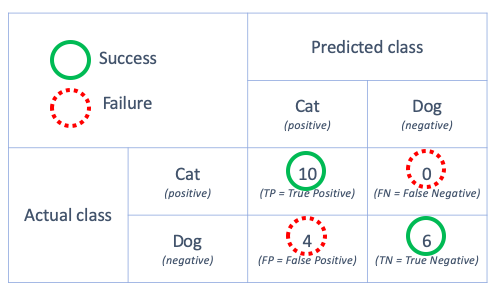

### **Exemple d'une fraude**

Vous avez une boutique en ligne.

99% de vos clients sont honnêtes. Mais le 1% de clients frauduleux vous coûte beaucoup d'argent.

Vous essayez donc de créer un modèle pour détecter et prédire les fraudeurs. Les prédictions seront analysées en détail par l'équipe chargée des risques.

- Votre premier modèle prédit qu'il n'y a pas de fraudeurs. Voici la matrice de confusion, et le calcul de l'accuracy score. Le score est excellent ! Mais votre modèle n'aide pas du tout l'équipe risque...
- Votre deuxième modèle prédit qu'il y a 4 fraudeurs. L'accuracy score est moins bon que le précédent. L'équipe va donc traiter 4 cas, dont un fraudeur. Votre modèle améliore grandement la vie de l'équipe, qui devait auparavant chercher parmi 100 clients !

**L'accuracy score est donc ici un mauvais indicateur. La priorité dans cet exemple est d'avoir aucun Faux Positif**. Vous devrez toujours réfléchir à la métrique la plus adaptée à votre problématique avant de lancer un algorithme de Machine Learning.

## Ressources 


Documentation officielle 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Les maths derrière

https://amitrajan012.github.io/post/classification_part1/

# Challenge


Dans ce challenge, vous utiliserez le célèbre dataset du titanic.

Créez une copie de [ce notebook](https://drive.google.com/file/d/1CbXlfitjKjJuiPv_20naios02-0EUEVa/view?usp=drive_link) et relevez le défi.